In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_colwidth', 800)
plt.rcParams['figure.figsize'] = [15, 15]

In [8]:
bbc_text = pd.read_csv('../data/processed/bbc_x_train.csv')
labels = pd.read_csv('../data/processed/bbc_y_train.csv')
labels_map = {0:'tech', 1:'business', 2:'sport', 3:'entertainment', 4:'politics'}
category = labels['category_id'].apply(lambda x: labels_map[x])
bbc = pd.concat([category, bbc_text], axis=1)
bbc.columns = ['category','text']
bbc.head()

,category,text
0,sport,dibaba breaks 5 000m world record ethiopia s tirunesh dibaba set a new world record in winning the women s 5 000m at the boston indoor games. dibaba won in 14 minutes 32.93 seconds to erase the previous world indoor mark of 14:39.29 set by another ethiopian berhane adera in stuttgart last year. but compatriot kenenisa bekele s record hopes were dashed when he miscounted his laps in the men s 3 000m and staged his sprint finish a lap too soon. ireland s alistair cragg won in 7:39.89 as bekele battled to second in 7:41.42. i didn t want to sit back and get out-kicked said cragg. so i kept on the pace. the plan was to go with 500m to go no matter what but when bekele made the mistake that was it. the race was mine. sweden s carolina kluft the olympic heptathlon champion and slo...
1,politics,talks held on gibraltar s future two days of talks on the future of gibraltar begin at jack straw s country residence later on wednesday. officials at the two-day summit at the foreign secretary s official kent house chevening will plan a new forum on the rock s future. in october mr straw and his spanish counterpart miguel moratinos agreed to establish a body that would give gibraltarians a voice in their future. most gibraltarians said in a referendum they wanted to remain british. gibraltar s chief minister peter caruana will represent the british citizens living on the rock while britain s europe director dominick chilcott will represent the uk. madrid is being represented by spain s director general for europe jose maria pons. the initiative follows spain s socialist govern...
2,tech,dvd copy protection strengthened dvds will be harder to copy thanks to new anti-piracy measures devised by copy protection firm macrovision. the pirated dvd market is enormous because current copy protection was hacked more than five years ago. macrovision says its new ripguard technology will thwart most but not all of the current dvd ripping (copying) programs used to pirate dvds. ripguard is designed to... reduce dvd ripping and the resulting supply of illegal peer to peer said the firm. macrovision said the new technology will work in nearly all current dvd players when applied to the discs but it did not specify how many machines could have a problem with ripguard. some bbc news website users have expressed concerns that the new technology will mean that dvds will not wor...
3,business,turkey-iran mobile deal at risk turkey s investment in iran s mobile industry looks set to be scrapped after its biggest mobile firm saw its investment there slashed by mps. iran s parliament voted by a large majority to cut turkcell s stake in a new mobile network from 70% to 49%. the move which was justified on national security grounds follows an earlier vote by mps to give themselves a veto over foreign investments. turkcell said the decision increases the risks attached to the project. although the company s statement said it would continue to monitor developments observers said they thought turkcell was set to pull out of the $3bn deal. the possibility of carrying out this project is next to zero said atinc ozkan analyst at finans investment in istanbul. if turkcell d...
4,tech,apple laptop is greatest gadget the apple powerbook 100 has been chosen as the greatest gadget of all time by us magazine mobile pc. the 1991 laptop was chosen because it was one of the first lightweight portable computers and helped define the layout of all future notebook pcs. the magazine has compiled an all-time top 100 list of gadgets which includes the sony walkman at number three and the 1956 zenith remote control at two. gadgets needed moving parts and/or electronics to warrant inclusion. the magazine staff compiled the list and specified that gadgets also needed to be a self-contained apparatus that can be used on its own not a subset of another device . in general we included only items that were potentially mobile said the magazine. in the end we tried to get

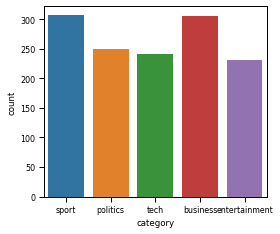

In [9]:
sns.set_context("paper", font_scale=0.9)
plt.figure(figsize=(4., 3.5))
plt.tight_layout()
bbc_cat_count = sns.countplot('category', data=bbc)
bbc_cat_count_fig = bbc_cat_count.get_figure()
bbc_cat_count_fig.savefig('bbc_cat_count.png', dpi=500)

In [10]:
def func(x):
    return len(x.split(' '))

bbc[bbc['category']=='tech']['text'].apply(func).describe()

count     241.000000
mean      547.871369
std       294.418841
min       192.000000
25%       368.000000
50%       469.000000
75%       678.000000
max      3229.000000
Name: text, dtype: float64

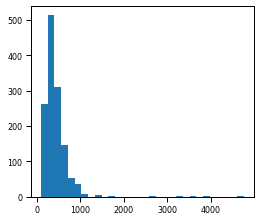

In [15]:
sns.set_context("paper", font_scale=0.9)
plt.figure(figsize=(4., 3.5))
plt.rcParams["axes.grid"] = False
sns.set_context("paper", font_scale=0.9)
plt.tight_layout()
plt.hist(bbc['text'].apply(func), bins=30)
plt.savefig('../figures/bbc_text_lengths.png', dpi=500)

In [28]:
bbc['text'].apply(func).describe()

count    1335.000000
mean      423.465918
std       285.518456
min        94.000000
25%       269.000000
50%       362.000000
75%       517.000000
max      4759.000000
Name: text, dtype: float64

In [5]:
bbc[bbc['category']=='business']['text'].apply(func).describe()

count    510.000000
mean     358.243137
std      149.461482
min      149.000000
25%      253.250000
50%      323.500000
75%      423.250000
max      994.000000
Name: text, dtype: float64

In [6]:
bbc[bbc['category']=='sport']['text'].apply(func).describe()

count     511.000000
mean      363.203523
std       206.238292
min       122.000000
25%       221.000000
50%       314.000000
75%       454.500000
max      1778.000000
Name: text, dtype: float64

In [7]:
bbc[bbc['category']=='entertainment']['text'].apply(func).describe()

count     386.000000
mean      364.357513
std       291.749255
min       155.000000
25%       245.000000
50%       290.500000
75%       403.000000
max      3866.000000
Name: text, dtype: float64

In [8]:
bbc[bbc['category']=='politics']['text'].apply(func).describe()

count     417.000000
mean      496.611511
std       323.724253
min        94.000000
25%       346.000000
50%       486.000000
75%       580.000000
max      4759.000000
Name: text, dtype: float64

In [17]:
from yellowbrick.text import FreqDistVisualizer
from yellowbrick.text import TSNEVisualizer
from yellowbrick.text import UMAPVisualizer
from yellowbrick.text import DispersionPlot
from yellowbrick.text import PosTagVisualizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text

bbc_stop_words = ['said', 'people', 'new', 'mr', 'quarter', '2004', 'month', 'year', 'ago', 'old', 'don', 'know',
                    'recent', 'months']
custom_stop_words = text.ENGLISH_STOP_WORDS.union(bbc_stop_words)

/Users/jeanne/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [18]:
vectorizer = TfidfVectorizer(stop_words=custom_stop_words, ngram_range=(2,2))
docs = vectorizer.fit_transform(bbc['text'])
features = vectorizer.get_feature_names()

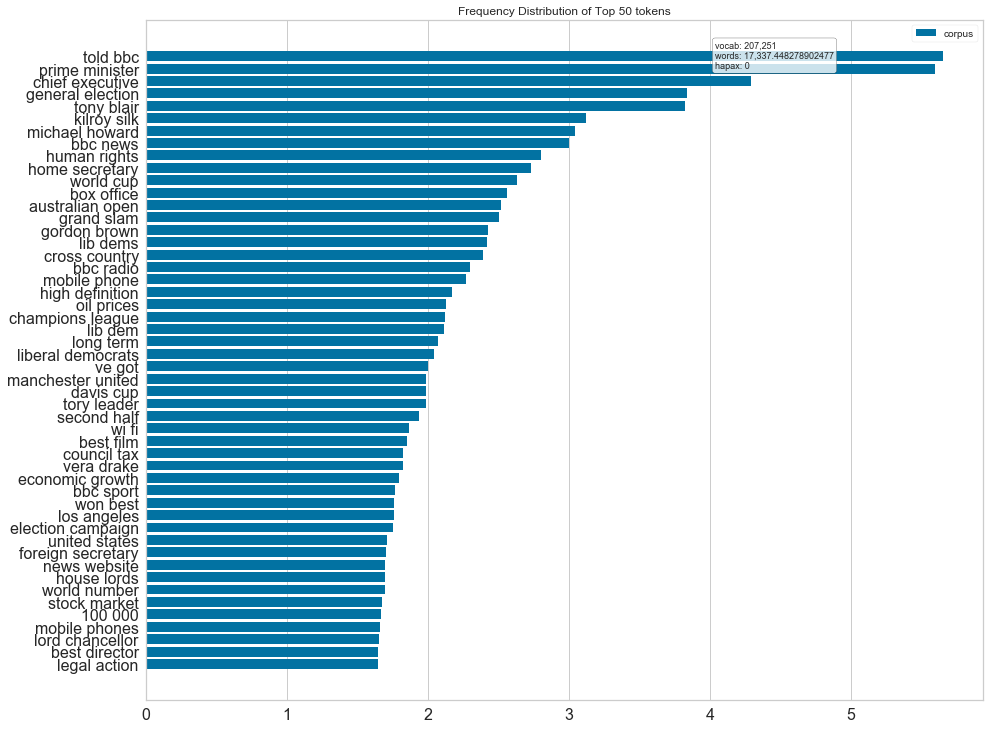

In [19]:
visualizer = FreqDistVisualizer(features=features,size=(1080,900))
visualizer.fit(docs)
visualizer.ax.tick_params(axis='both', which='major', labelsize=16)
visualizer.show()

In [20]:
# https://www.scikit-yb.org/en/latest/api/text/freqdist-3.py
from collections import defaultdict
articles = defaultdict(list)
for text, label in zip(bbc['text'], bbc['category']):
  articles[label].append(text)
vectorizer = TfidfVectorizer(stop_words=custom_stop_words, ngram_range=(2,2))
docs = vectorizer.fit_transform(text for text in articles['tech'])
features = vectorizer.get_feature_names()

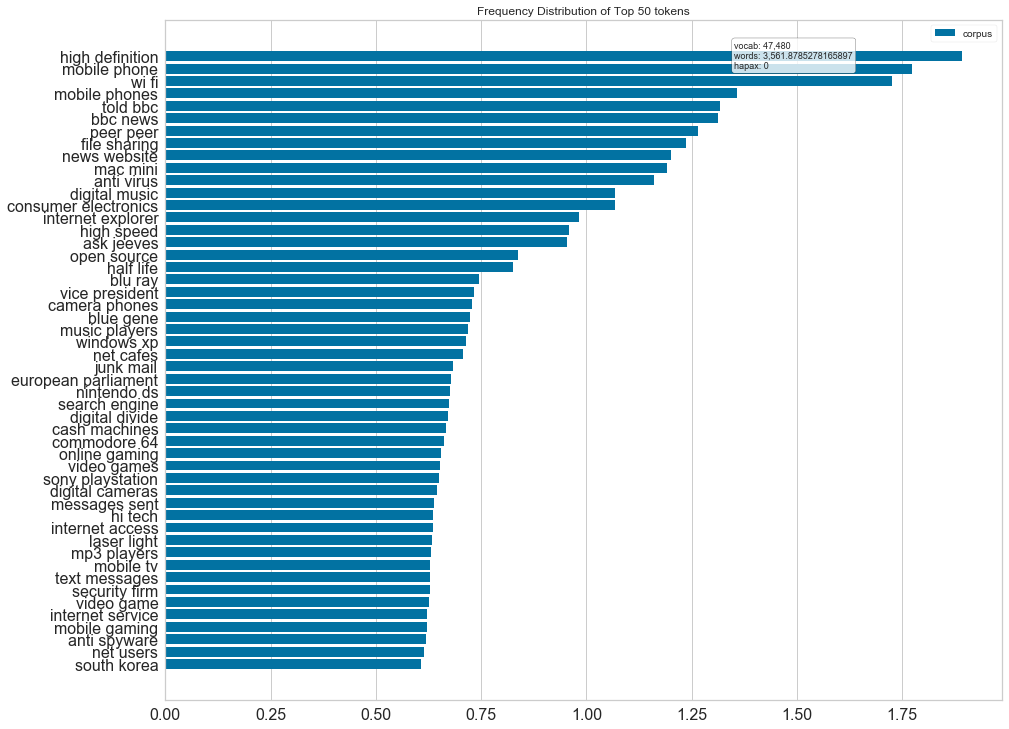

In [22]:
visualizer = FreqDistVisualizer(features=features,size=(1080,900))
visualizer.fit(docs)
visualizer.ax.tick_params(axis='both', which='major', labelsize=16)
visualizer.show(outpath='../figures/tech_tfidf_dist.png')

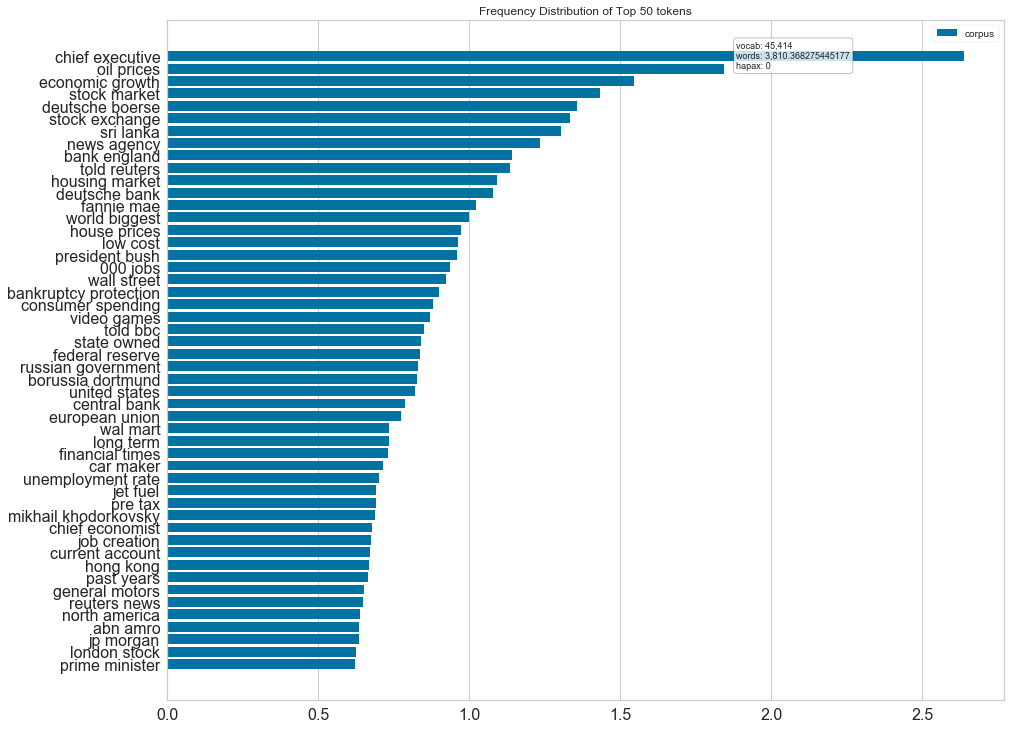

In [24]:
from collections import defaultdict
articles = defaultdict(list)
for text, label in zip(bbc['text'], bbc['category']):
  articles[label].append(text)
vectorizer = TfidfVectorizer(stop_words=custom_stop_words, ngram_range=(2,2))
docs = vectorizer.fit_transform(text for text in articles['business'])
features = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, size=(1080,900))
visualizer.fit(docs)
visualizer.ax.tick_params(axis='both', which='major', labelsize=16)
visualizer.show(outpath='../figures/business_tfidf_dist.png')

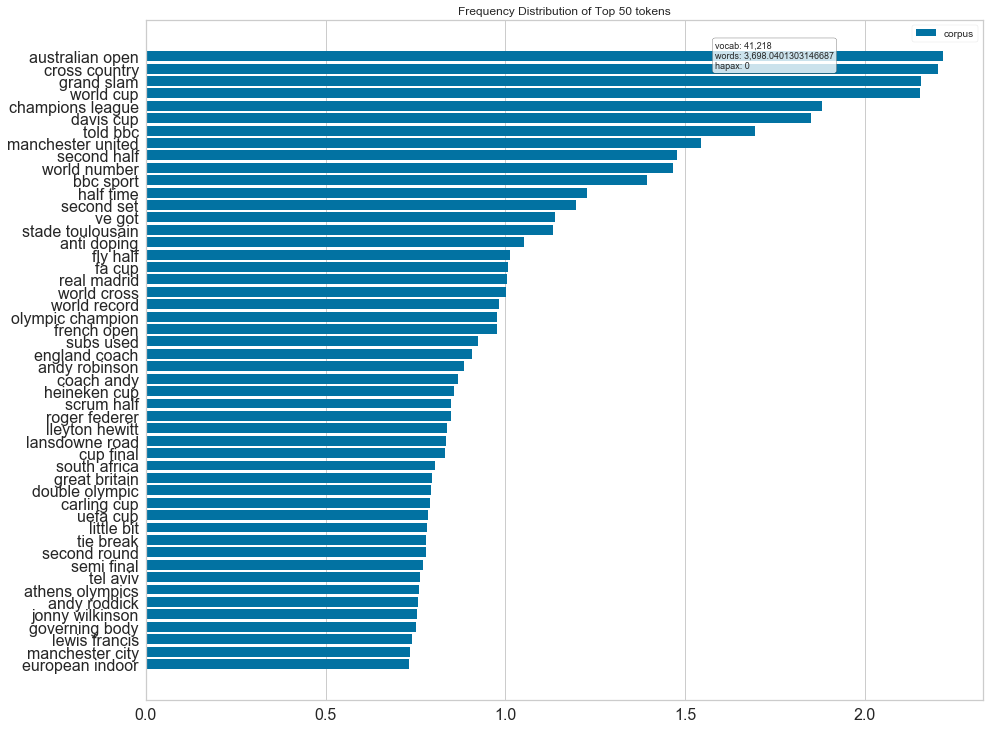

In [25]:
from collections import defaultdict
articles = defaultdict(list)
for text, label in zip(bbc['text'], bbc['category']):
  articles[label].append(text)
vectorizer = TfidfVectorizer(stop_words=custom_stop_words, ngram_range=(2,2))
docs = vectorizer.fit_transform(text for text in articles['sport'])
features = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, size=(1080,900))
visualizer.fit(docs)
visualizer.ax.tick_params(axis='both', which='major', labelsize=16)
visualizer.show(outpath='../figures/sport_tfidf_dist.png')

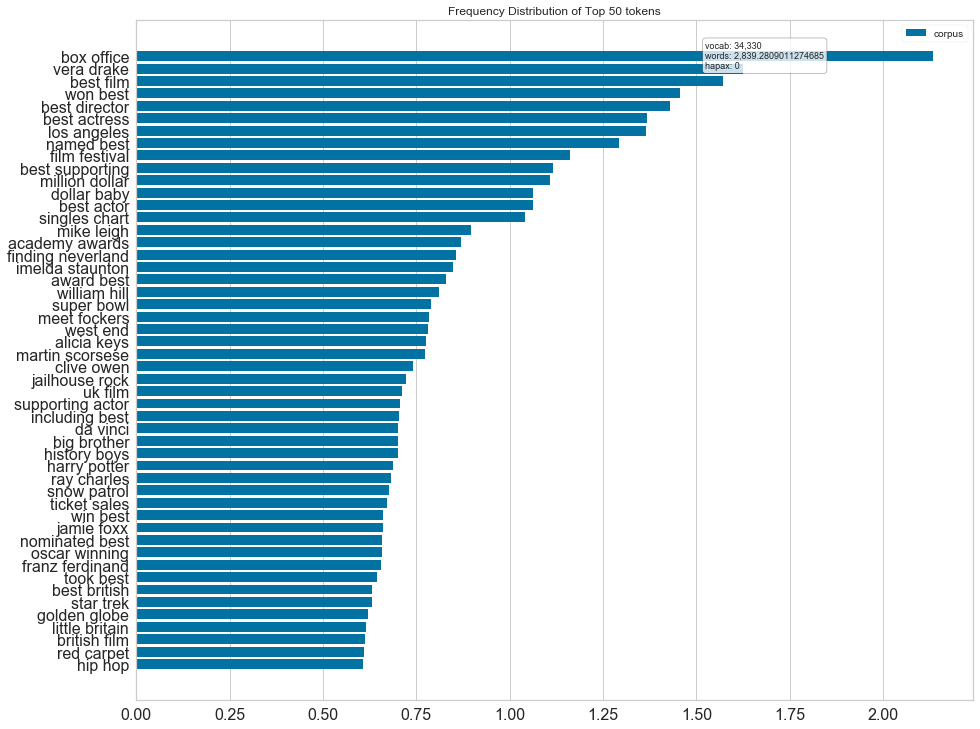

In [26]:
docs = vectorizer.fit_transform(text for text in articles['entertainment'])
features = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, size=(1080,900))
visualizer.fit(docs)
visualizer.ax.tick_params(axis='both', which='major', labelsize=16)
visualizer.show(outpath='../figures/entertainment_tfidf_dist.png')

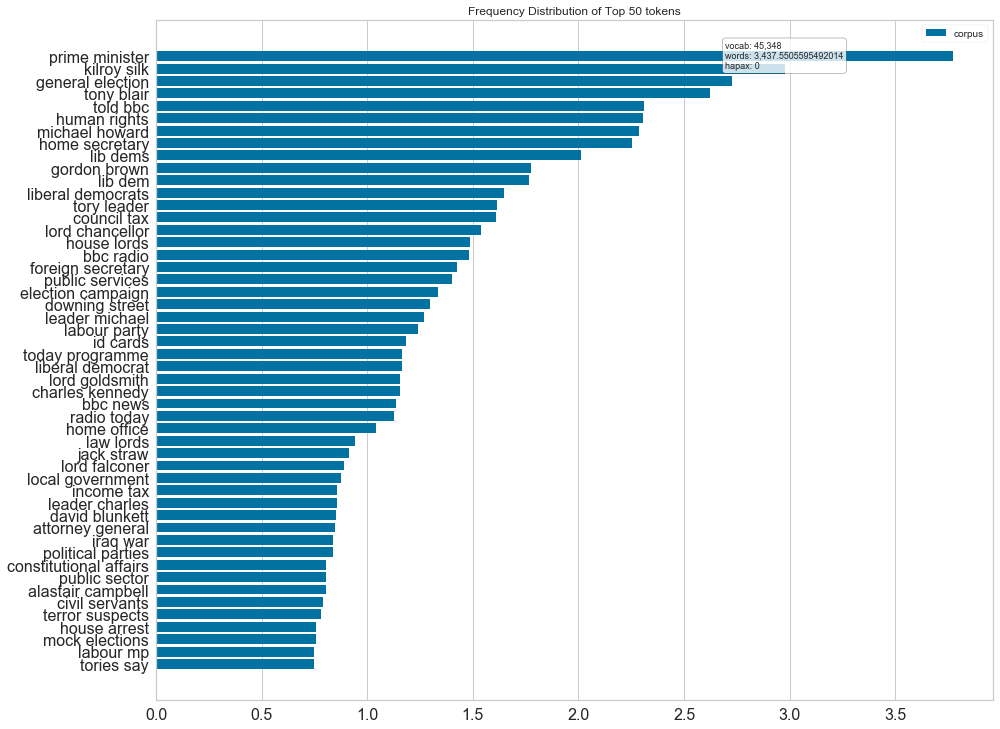

In [27]:
from collections import defaultdict
articles = defaultdict(list)
for text, label in zip(bbc['text'], bbc['category']):
  articles[label].append(text)
docs = vectorizer.fit_transform(text for text in articles['politics'])
features = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, size=(1080,900))
visualizer.fit(docs)
visualizer.ax.tick_params(axis='both', which='major', labelsize=16)
visualizer.show(outpath='../figures/politics_tfidf_dist.png')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

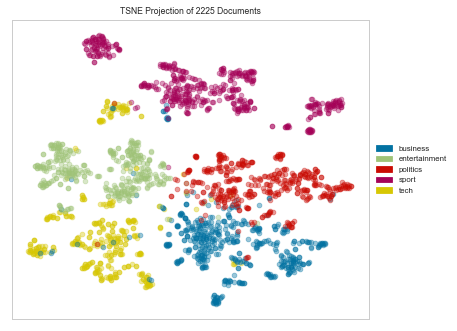

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words=custom_stop_words)
X = tfidf.fit_transform(bbc['text'])
y = bbc['category']
tsne = TSNEVisualizer(alpha=0.4)
tsne.fit(X, y)
tsne.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

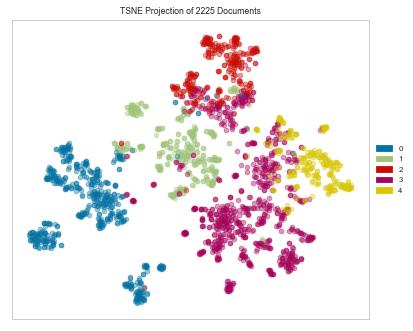

In [42]:
# unsupervised clustering
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words=custom_stop_words)
X = tfidf.fit_transform(bbc['text'])
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
y = kmeans.labels_
tsne = TSNEVisualizer(alpha=0.4)
tsne.fit(X, y)
tsne.show(outpath='figures/bbc_tsne_kmeans.png')

In [40]:
import joblib
joblib.dump(kmeans, 'kmeans.joblib')

['kmeans.joblib']

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words=custom_stop_words).fit(bbc['text'])
joblib.dump(tfidf, 'tfidf.joblib')

['tfidf.joblib']

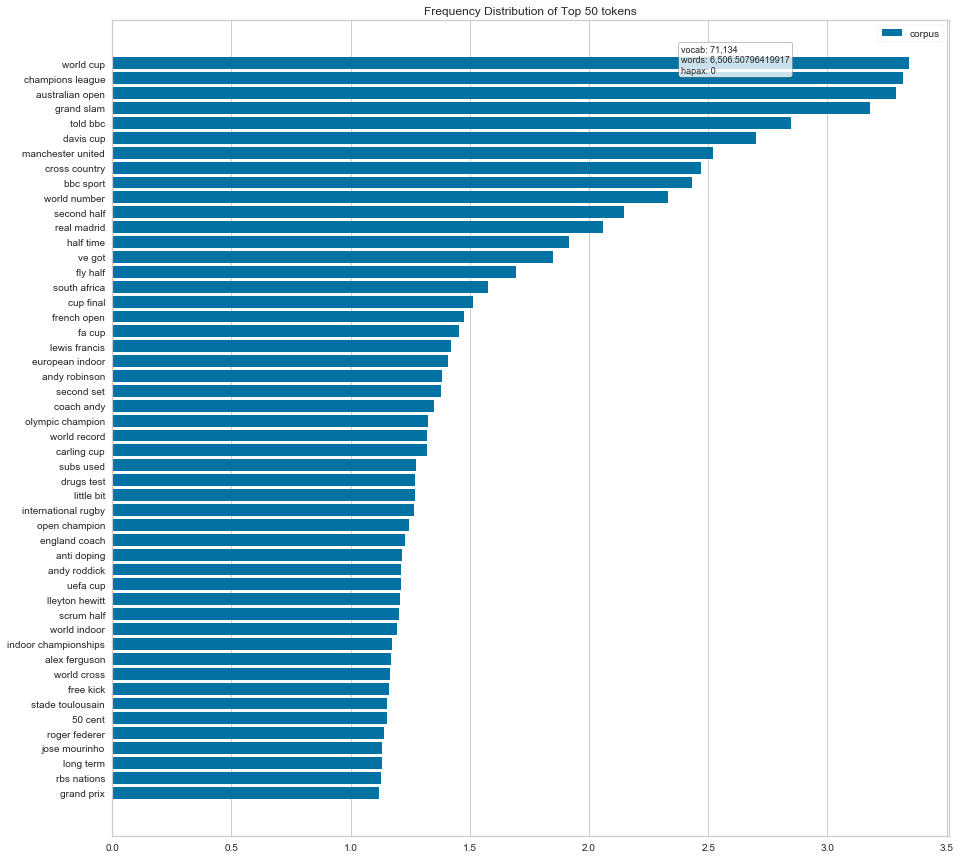

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words=custom_stop_words, ngram_range=(2,2))
bbc['kmeans_labels'] = kmeans.labels_
articles = defaultdict(list)
for text, label in zip(bbc['text'], bbc['kmeans_labels']):
  articles[label].append(text)
docs = tfidf.fit_transform(text for text in articles[0])
features = tfidf.get_feature_names()
visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.show()

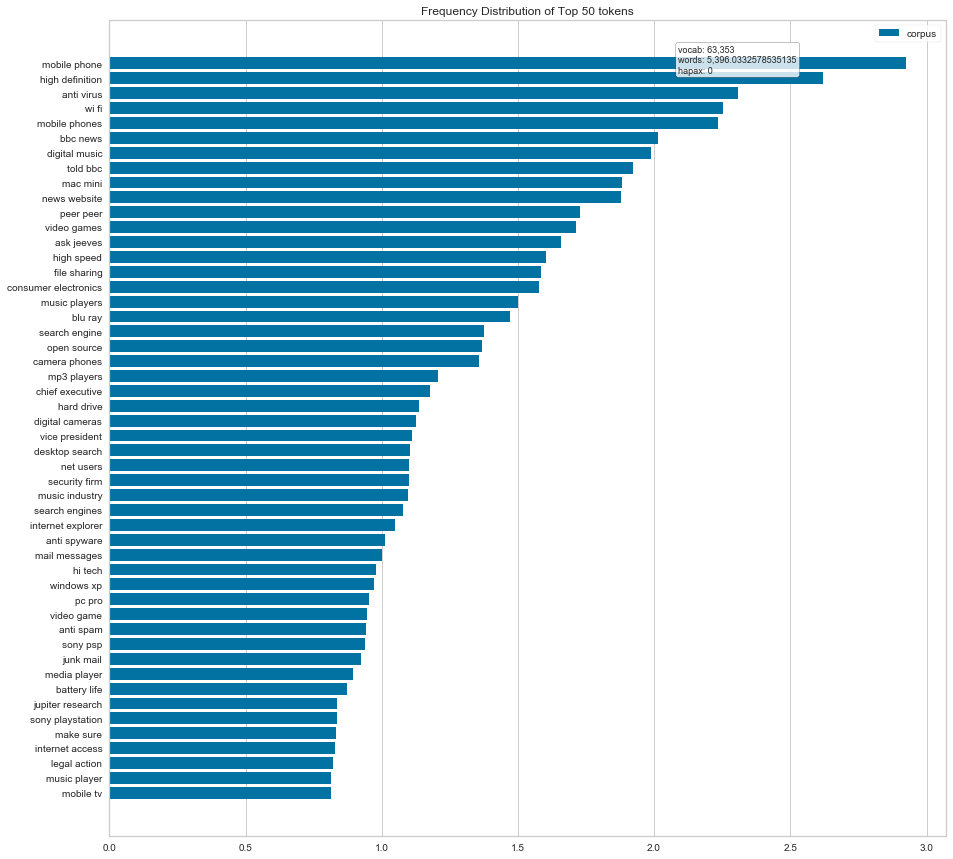

In [55]:
docs = tfidf.fit_transform(text for text in articles[1])
features = tfidf.get_feature_names()
visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.show()

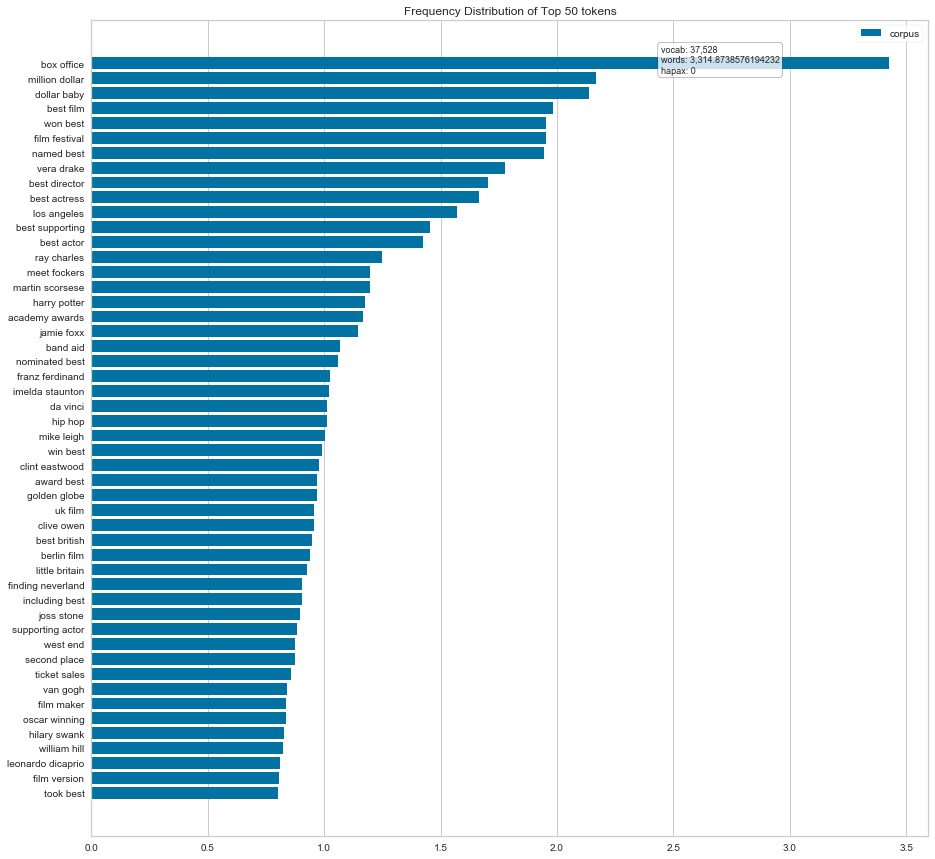

In [56]:
docs = tfidf.fit_transform(text for text in articles[2])
features = tfidf.get_feature_names()
visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.show()

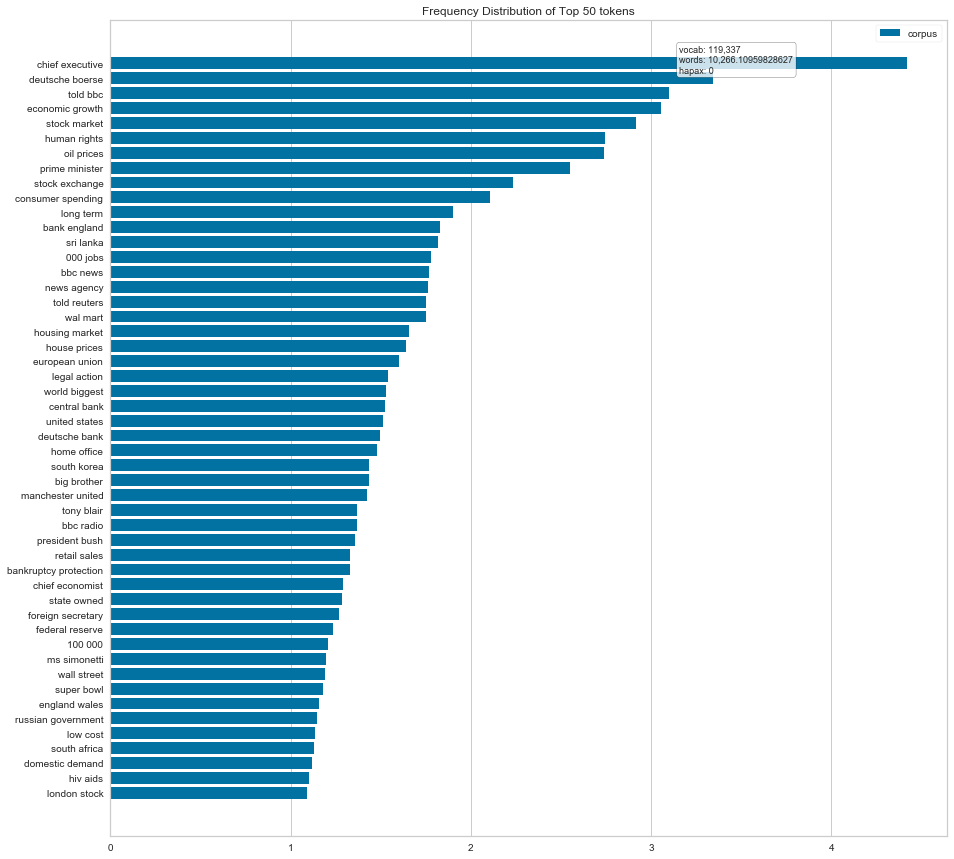

In [57]:
docs = tfidf.fit_transform(text for text in articles[3])
features = tfidf.get_feature_names()
visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.show()

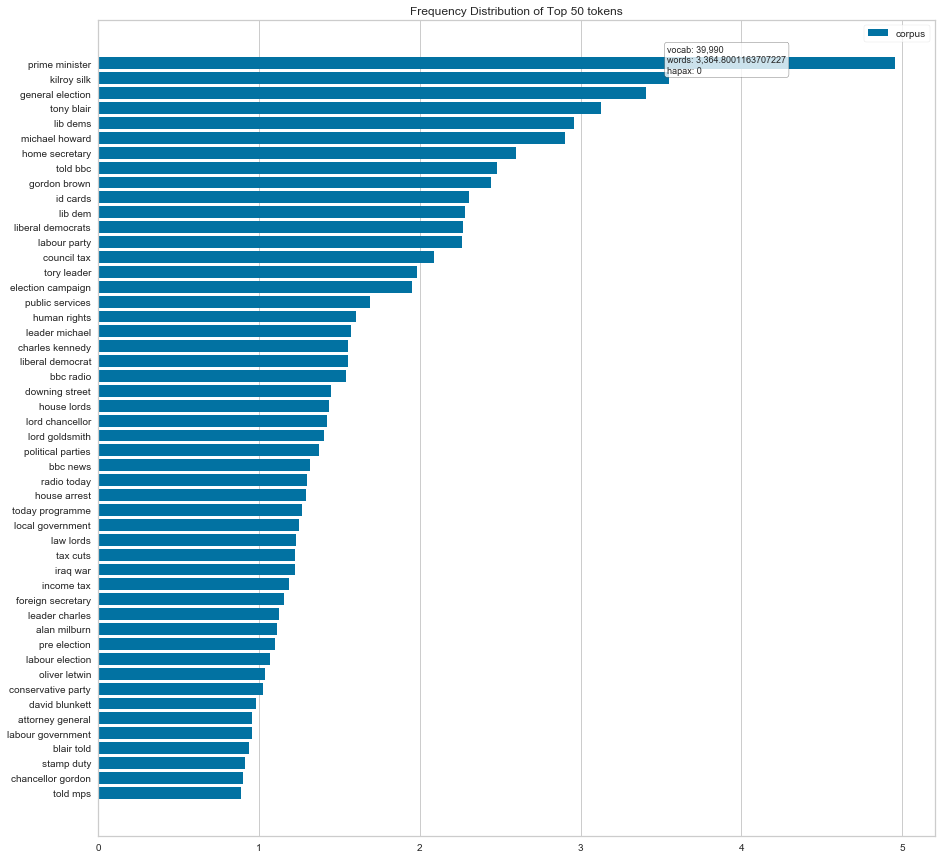

In [58]:
docs = tfidf.fit_transform(text for text in articles[4])
features = tfidf.get_feature_names()
visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.show()

In [22]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit_transform(X)

array([[0.94253887, 0.01440261, 0.01435293, 0.01435264, 0.01435295],
       [0.90816271, 0.02259847, 0.02260126, 0.02403696, 0.0226006 ],
       [0.85404638, 0.07363224, 0.0241072 , 0.02410699, 0.0241072 ],
       ...,
       [0.91138311, 0.02215981, 0.0221525 , 0.02215206, 0.02215252],
       [0.93580426, 0.0160407 , 0.01606452, 0.01604491, 0.01604561],
       [0.90680363, 0.02338078, 0.02327157, 0.02327244, 0.02327158]])

In [23]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words-1:-1]])
        print(message)

    
feature_names = tfidf.get_feature_names()

print_top_words(lda, feature_names, 30)

Topic #0: film government world uk labour best time game election music blair years told 000 number just party make market bbc like set brown win games company added won sales play
Topic #1: rugby robinson england ireland wenger referee lions wales arsenal bath hodgson wilkinson ruddock woodward gara driscoll italy wasps ball henson zealand flanker bellamy scrum leicester cole nations newcastle dallaglio penalty
Topic #2: juninho rover seafarers gorges cartridges printer metlife slug yili newry yangtze novo 2d vioxx bach asimo inkjet jaynes hariri solidere schrader sfa aaliyah pbgc lebanon varga hassell saic merck vignal
Topic #3: lse boerse ebbers mci euronext verizon wmc capriati qwest regiments argonaut wolves anil viotti borussia hoddle bdo ambani dortmund tci tgwu mukesh fenice xstrata sayeed ajax umbro curbishley ivanovic 7e7
Topic #4: marsh mirza rochus spitzer adelaide bloglines wipro kronor rossignol feta melzer wpp hardcourt jarvis botin hardie chela ignacio joachim enqvist l